In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import json
import pprint
import matplotlib.pyplot as plt

In [2]:
# initialize pretty printer
pp = pprint.PrettyPrinter(indent=4, depth=8)

In [3]:
# read results from json-file
results_file_path='results/test_verse_ppr_experiment_results.json'
experiment_results = {}

with open(results_file_path, 'r') as results_file:
     experiment_results = json.load(results_file)

In [4]:
# pretty print results file content
pp.pprint(experiment_results)

{   'dataset': 'Test-Data',
    'embedding_file': 'data/test_converter_verse_embeddings.bin',
    'method': 'Verse-PPR',
    'parameterizations': [   {   'params': {'n_clusters': 2},
                                 'runs': [   {   'evaluation': {   'nmi': 0.0049311472614544695,
                                                                   'silhouette': 0.2900736927986145},
                                                 'experiment': 140608036956816,
                                                 'random_seed': 42,
                                                 'run': 1},
                                             {   'evaluation': {   'nmi': 0.17490772832691745,
                                                                   'silhouette': 0.15746554732322693},
                                                 'experiment': 140608036957040,
                                                 'random_seed': 43,
                                                 'run': 2}]},
  

In [5]:
# print general information
print('Embedding-Method: {}'.format(experiment_results['method']))
print('Dataset: {}'.format(experiment_results['dataset']))
print('Used embedding: {}'.format(experiment_results['embedding_file']))
print('Number of different hyper_parameter settings: {}'.format(len(experiment_results['parameterizations'])))

Embedding-Method: Verse-PPR
Dataset: Test-Data
Used embedding: data/test_converter_verse_embeddings.bin
Number of different hyper_parameter settings: 2


In [6]:
# print all hyper-parameter settings
for index, setting in enumerate(experiment_results['parameterizations']):
    print('{}. {}'.format(index+1, setting['params']))

1. {'n_clusters': 2}
2. {'n_clusters': 3}


In [7]:
# print evaluation results for each run
for run in experiment_results['parameterizations'][0]['runs']:
    print('{}. {}'.format(run['run'],run['evaluation']))

1. {'nmi': 0.0049311472614544695, 'silhouette': 0.2900736927986145}
2. {'nmi': 0.17490772832691745, 'silhouette': 0.15746554732322693}


In [8]:
# print used evaluation metrics
evaluation_metrics = list(experiment_results['parameterizations'][0]['runs'][0]['evaluation'].keys())
pp.pprint(evaluation_metrics)

['nmi', 'silhouette']


In [9]:
# dict of evaluation metrics with all performances scores over all runs
total_eval_results = {}
for metric in evaluation_metrics:
    total_eval_results_for_metric = []
    for run in experiment_results['parameterizations'][0]['runs']:
        total_eval_results_for_metric.append(run['evaluation'][metric])
    total_eval_results[metric] = np.array(total_eval_results_for_metric)

pp.pprint(total_eval_results)

{   'nmi': array([ 0.00493115,  0.17490773]),
    'silhouette': array([ 0.29007369,  0.15746555])}


In [10]:
# compute average performance per evaluation metric over all runs
avg_total_eval_results = {}
for metric in evaluation_metrics:
    avg_total_eval_results[metric] = np.mean(total_eval_results[metric], axis=0)

pp.pprint(avg_total_eval_results)

{'nmi': 0.089919437794185958, 'silhouette': 0.22376962006092072}


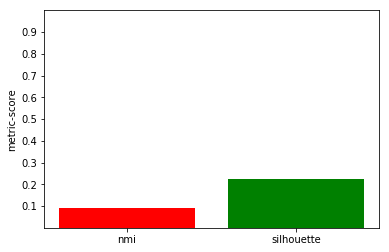

In [11]:
# bar plot with avergae scores over all runs for each metric
bar_list = plt.bar(range(len(avg_total_eval_results)), list(avg_total_eval_results.values()),
                   align='center', color=['red', 'green', 'blue', 'cyan'])

axes = plt.gca()
axes.set_ylim([0,1])
plt.xticks(range(len(avg_total_eval_results)), list(avg_total_eval_results.keys()))
plt.yticks([0.1 * i for i in range(1,10)])
plt.ylabel('metric-score')
plt.show()

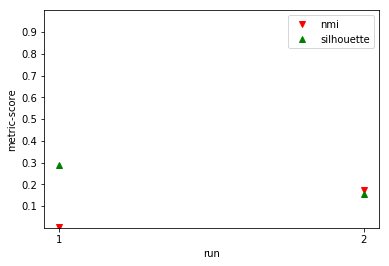

In [12]:
num_of_runs = len(experiment_results['parameterizations'][0]['runs'])
data_point_shapes = ['v', '^', '<', '>']
data_colors = ['r', 'g', 'b', 'c']

ax = plt.subplot(111)

for index, metric in enumerate(evaluation_metrics):
    ax.plot(range(1,num_of_runs+1),total_eval_results[metric], data_point_shapes[index]+data_colors[index],
            label='{}'.format(metric))

ax.legend()
axes = plt.gca()
axes.set_ylim([0,1])
plt.xlabel('run')
plt.ylabel('metric-score')
plt.xticks(range(1,num_of_runs+1))
plt.yticks([0.1 * i for i in range(1,10)])
plt.show()